<a href="https://colab.research.google.com/github/uk-2149/uk_ml_prjcts/blob/main/Linear_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([1.0, 1.5, 2.0, 2.75, 3.0])
y_train = np.array([300.0, 360.0, 500.0, 540.0, 650.0,])
m = x_train.shape[0]

w = 100
b = 100

In [ ]:
def compute_model_output(x, w, b):
  m = x.shape[0]
  y_hat = np.zeros(m)
  for i in range(m):
    y_hat[i] = w*x[i] + b
  return y_hat

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost_sum = 0
  for i in range(m):
    y_hat = w*x[i] + b
    cost = (y_hat - y[i])**2
    cost_sum += cost
  total_cost = cost_sum / (2*m)
  return total_cost

In [ ]:
a = compute_cost(x_train, y_train, w, b)
print(a)

15182.5


In [ ]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    y_hat = w*x[i] + b
    dj_dw_i = (y_hat - y[i])*x[i]
    dj_db_i = (y_hat - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  # x = input data
  # y = target values
  # w_in and b_in = initial values of w and b
  # alpha = learning rate
  # num_iters = number of iterations to run gradient descent
  # cost_function = function to compute cost
  # gradient_function = function to compute gradient

  J_history = [] # history of cost values
  p_history = [] # history of parameters w and b
  w = w_in
  b = b_in

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)

    # Save cost J at each iteration
    if (i < 100000): # to prevent resource exhaustion
      J_history.append(cost_function(x, y, w, b))
      p_history.append([w,b])
    # Print cost at every 10 intervals and at every interval if i<10
    if (i % math.ceil(num_iters/10) == 0):
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, J_history, p_history

In [ ]:
iterations = 10000
tmp_alpha = 0.01
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w, b, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.36e+04  dj_dw: -3.738e+02, dj_db: -1.650e+02   w:  1.037e+02, b: 1.01650e+02
Iteration 1000: Cost 4.45e+02  dj_dw:  9.724e-02, dj_db: -2.212e-01   w:  1.644e+02, b: 1.32810e+02
Iteration 2000: Cost 4.45e+02  dj_dw:  3.616e-02, dj_db: -8.226e-02   w:  1.638e+02, b: 1.34214e+02
Iteration 3000: Cost 4.45e+02  dj_dw:  1.345e-02, dj_db: -3.059e-02   w:  1.635e+02, b: 1.34736e+02
Iteration 4000: Cost 4.45e+02  dj_dw:  5.000e-03, dj_db: -1.137e-02   w:  1.634e+02, b: 1.34930e+02
Iteration 5000: Cost 4.45e+02  dj_dw:  1.859e-03, dj_db: -4.229e-03   w:  1.634e+02, b: 1.35002e+02
Iteration 6000: Cost 4.45e+02  dj_dw:  6.913e-04, dj_db: -1.573e-03   w:  1.634e+02, b: 1.35029e+02
Iteration 7000: Cost 4.45e+02  dj_dw:  2.571e-04, dj_db: -5.848e-04   w:  1.634e+02, b: 1.35039e+02
Iteration 8000: Cost 4.45e+02  dj_dw:  9.559e-05, dj_db: -2.175e-04   w:  1.634e+02, b: 1.35042e+02
Iteration 9000: Cost 4.45e+02  dj_dw:  3.555e-05, dj_db: -8.087e-05   w:  1.634e+02, b: 1.35044e+02


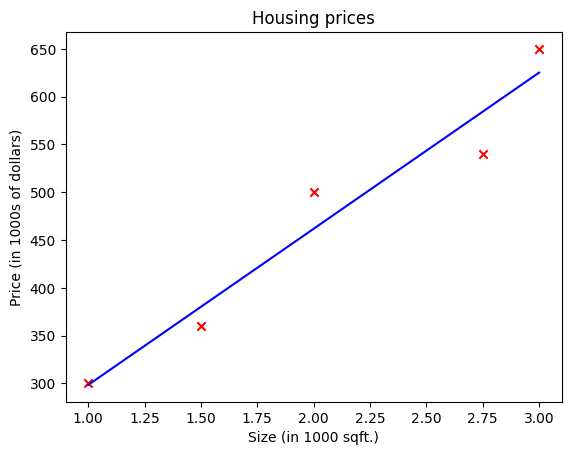

In [ ]:
temp_y_hat = compute_model_output(x_train, w_final, b_final)

plt.plot(x_train, temp_y_hat, c='b', label="our predictions")
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing prices")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (in 1000 sqft.)")
plt.show()

In [ ]:
x_test = np.array([2.75])
y_hat_test = compute_model_output(x_test, w_final, b_final)
print(f"The predicted price for a house of size {x_test[0]*1000} sqft. is ${round(y_hat_test[0]*1000,2)}")

The predicted price for a house of size 2750.0 sqft. is $584375.06
